# The HR Diagram
This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by [Deepraj Baidya](https://github.com/deepraj1729) and was originally published on [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
sns.set_style('white')

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x72a2d7f60790>)

I'll take this as an opportunity to introduce `pandas` and `seaborn`, which are popular python packages. The are similar to `numpy` and `matplotlib`, but newer. I personally prefer my good old numpy, but these are *very* popular, so here is something you can do with them. 

In [3]:
import pandas as pd
df_stars = pd.read_csv('stars.csv')

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


There are 6 star types that are encoded in the *'Star type'* column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


We've seen this already last time. It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:
* are there any missing values?
* are there NaNs in the data?

Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:
![](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)

We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

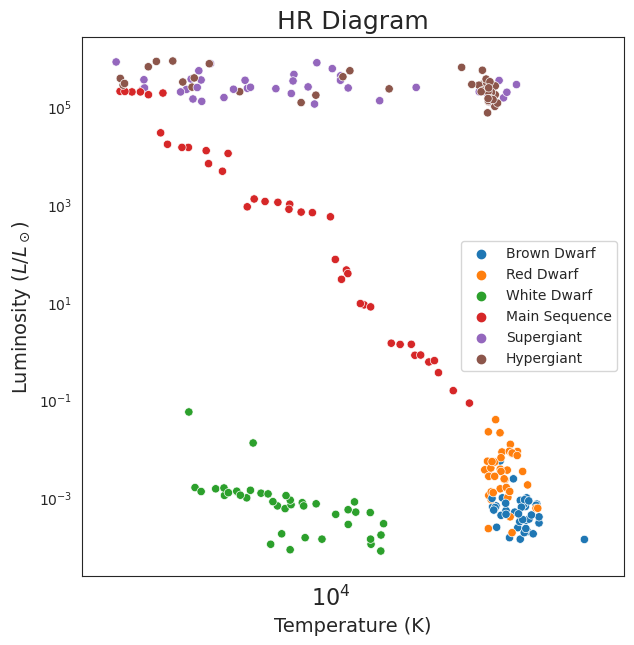

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(7, 7))

# Create scatterplot
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

# Set the x and y axes to logarithmic scales
plt.xscale('log')
plt.yscale('log')

# Customize the ticks and limits
plt.xticks([5000, 10000, 50000], fontsize=16)
plt.xlim(5e4, 1.5e3)

# Customize labels and title
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel(r'Luminosity ($L/L_\odot$)', fontsize=14)
plt.title('HR Diagram', fontsize=18)

# Show plot
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

## Apply PCA to our dataset

In [7]:
from sklearn.decomposition import PCA

#### Let's first check if there are missing values

In [8]:
non_miss_val = df_stars.notnull()
non_miss_cnt = non_miss_val.sum()
print(non_miss_cnt)

Temperature (K)           240
Luminosity(L/Lo)          240
Radius(R/Ro)              240
Absolute magnitude(Mv)    240
Star type                 240
Star color                240
Spectral Class            240
dtype: int64


In [9]:
# Are there any Nan?
nan_df = df_stars[df_stars.isna().any(axis=1)]
print(nan_df)

Empty DataFrame
Columns: [Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude(Mv), Star type, Star color, Spectral Class]
Index: []


In [10]:
df_stars.columns=['Temperature', 'Luminosity', 'Radius', 'Magnitude', 'Type', 'Color', 'Spectral']

In [11]:
features = df_stars[['Temperature', 'Luminosity', 'Radius', 'Magnitude']]

In [12]:
pca = PCA()
pca.fit(features)

PCA()

In [13]:
pca = PCA()
new_features = pca.fit_transform(features)

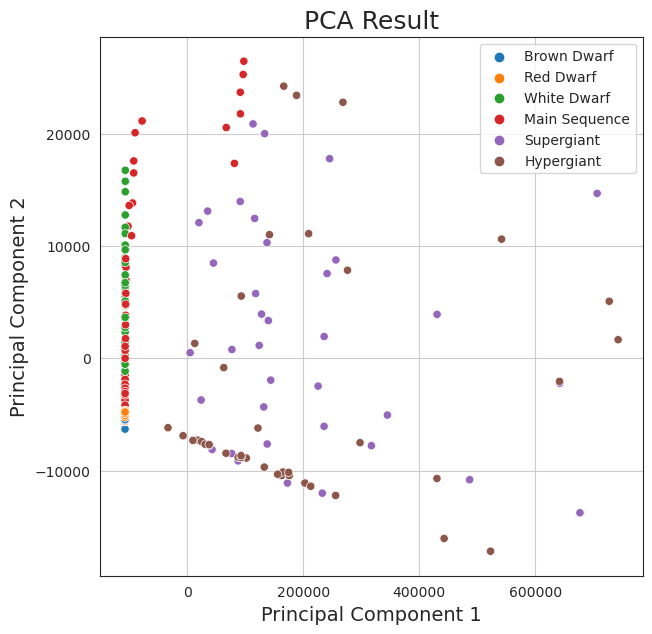

In [14]:
PC1 = new_features[:,0]
PC2 = new_features[:,1]

fig = plt.figure(figsize=(7,7))
sns.scatterplot(x=PC1, y=PC2, hue=labels)
plt.xlabel('Principal Component 1', fontsize=14)
plt.xlim(-150000)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA Result', fontsize=18)
plt.grid(True)
plt.show();

In [15]:
evals = pca.explained_variance_ratio_
print(f'Explained Variance Ratio by 2 components: {100*np.sum(evals[:2]):.2f} %')
for i, eval in enumerate(evals, 0):
    print(f'Component {i+1} Contribution: {(100 * evals[i]):.2f}%')

Explained Variance Ratio by 2 components: 100.00 %
Component 1 Contribution: 99.76%
Component 2 Contribution: 0.24%
Component 3 Contribution: 0.00%
Component 4 Contribution: 0.00%


This seemps terrible. Let's see what happens if I **scale the data** first!

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca_scaled = PCA()

pca_scaled.fit(features_scaled)
features_transf_scaled = pca_scaled.transform(features_scaled)

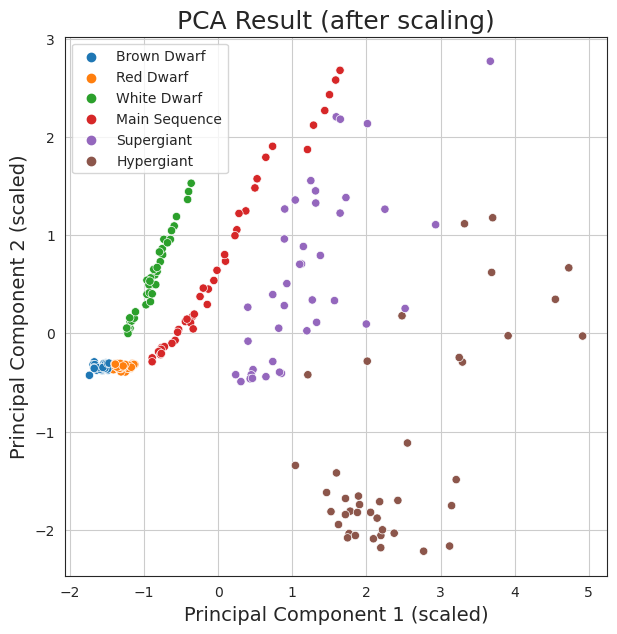

In [17]:
PC1_s = features_transf_scaled[:,0]
PC2_s = features_transf_scaled[:,1]

fig = plt.figure(figsize=(7,7))
sns.scatterplot(x=PC1_s, y=PC2_s, hue=labels)
plt.xlabel('Principal Component 1 (scaled)', fontsize=14)
plt.ylabel('Principal Component 2 (scaled)', fontsize=14)
plt.title('PCA Result (after scaling)', fontsize=18)
plt.grid(True)
plt.show();

In [18]:
evals = pca_scaled.explained_variance_ratio_

In [19]:
print(f'Explained Variance Ratio by 2 components: {100*np.sum(evals[:2]):.2f} %')

Explained Variance Ratio by 2 components: 83.86 %


In [20]:
for i, eval in enumerate(evals, 0):
    print(f'Component {i+1} Contribution: {(100 * evals[i]):.2f}%')

Component 1 Contribution: 60.36%
Component 2 Contribution: 23.50%
Component 3 Contribution: 9.33%
Component 4 Contribution: 6.81%


### Scree Plots

Text(0.5, 1.0, 'Variance embedded in the cumulative PCA components')

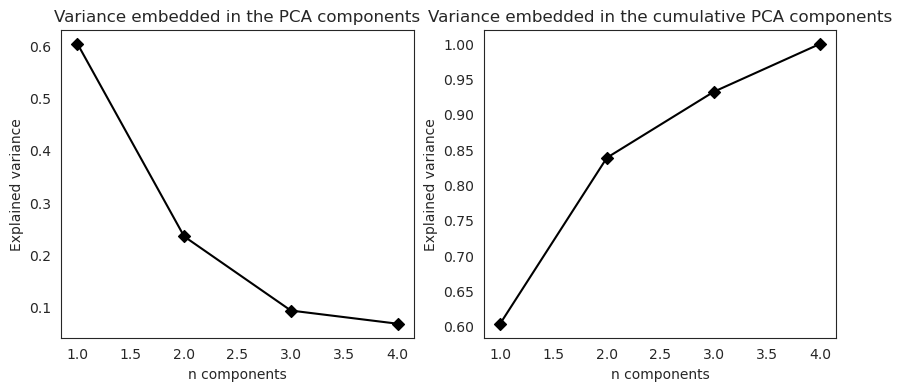

In [21]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

ax[0].plot(np.arange(1,len(evals)+1),evals,color='black')
ax[0].scatter(np.arange(1,len(evals)+1),evals,color='black',marker='D')
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance')
ax[0].set_title('Variance embedded in the PCA components')

ax[1].plot(np.arange(1,len(evals)+1),np.cumsum(evals),color='black')
ax[1].scatter(np.arange(1,len(evals)+1),np.cumsum(evals),color='black',marker='D')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Explained variance')
ax[1].set_title('Variance embedded in the cumulative PCA components')


# Classification
Next time ;)